## Clusterization
The goal of the notebook is to provide an additional analysis of the customers that subsrcibes the product. I assume, that if the bank wants to target that group in their campaigns, it would be interested what different segments of clients are in the group. 
I will cluster the customers that subscribed the product using DBSCAN algorithm. For this analysis I will only use features related with bank client- not with campaign or social and economic context attributes. I will use as a source data preprocessed in features engineering notebook and only the features that were chosen as relevant to the taget by Lasso algorithm.  

In [102]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler
from sklearn.manifold import TSNE
import warnings
warnings.filterwarnings("ignore")

In [103]:
# Read data prepared in feature engineering notebook
df = pd.read_csv("df_subscribed.csv", index_col=0)

In [104]:
df.columns

Index(['age', 'education', 'campaign', 'pdays', 'previous', 'cons.price.idx',
       'cons.conf.idx', 'nr.employed', 'job_blue-collar', 'job_admin.',
       'job_services', 'job_student', 'job_retired', 'marital_single',
       'default_unknown', 'default_no', 'contact_telephone', 'month_may',
       'month_aug', 'month_jul', 'month_nov', 'month_mar', 'month_sep',
       'month_jun', 'day_of_week_mon', 'day_of_week_fri', 'poutcome_failure',
       'y'],
      dtype='object')

In [105]:
# Choose columns related to client
columns = ['age', 'education', 'job_blue-collar', 'job_admin.',
       'job_services', 'job_student', 'job_retired', 'marital_single',
       'default_unknown', 'default_no']

In [106]:
# Filter dataframe
df =df.loc[:, columns]

In [107]:
# Scale features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df)

In [108]:
# Cluster data using DBSCAN
clustering = DBSCAN(eps=2, min_samples=10).fit(X_scaled)
df["cluster"] = clustering.labels_

In [117]:
# I will visulalize the clusters using dimentionality reduciton algoritm TSNE
X_tsne = TSNE(n_components=2).fit_transform(X_scaled)
df["x_component"]=X_tsne[:,0]
df["y_component"]=X_tsne[:,1]

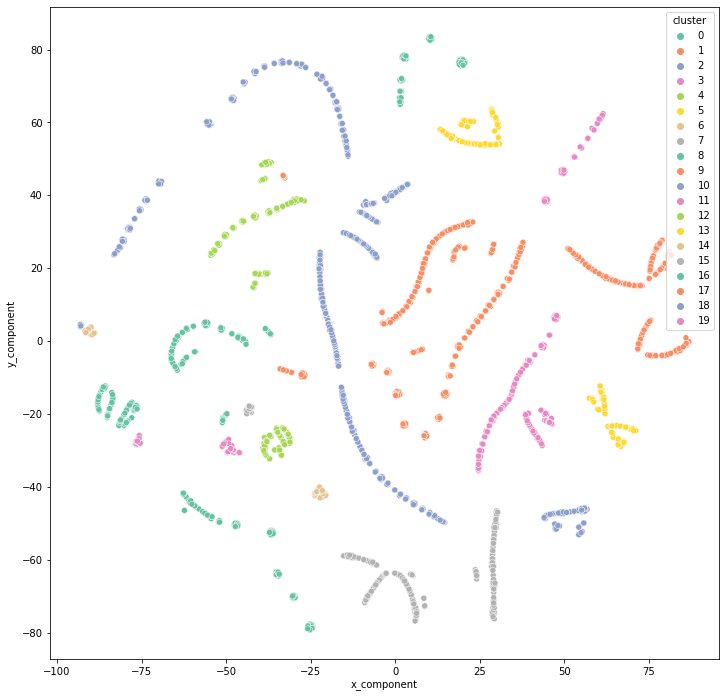

In [118]:
# Scatterplot presenting the clusters in 2d space
plt.figure(figsize=(12,12))
ax = sns.scatterplot(data=df[df["cluster"]!= -1], x="x_component", y="y_component", hue="cluster", palette="Set2")

#### Comment
As visualized on the plot it looks like there are groups of similar customers. I will calculate some statistics to understand specific features of some clusters

In [119]:
# Calculate statistics per cluster - mean value, Z-score of mean value
cluster_mean = df.drop(["x_component", "y_component"], axis=1).groupby("cluster").mean().unstack().reset_index()
cluster_analysis = df.drop(["x_component", "y_component"], axis=1).groupby("cluster", group_keys=True).mean().apply(lambda x: (x - x.mean())/ x.mean())
cluster_z_score = cluster_analysis.unstack().reset_index()
cluster_summary = cluster_mean.merge(cluster_z_score, on=["cluster", "level_0"]).rename(columns= {"0_x": "mean", "0_y": "z_score"})

#### Analysis of some clusters

In [120]:
# Cluster 11
cluster_summary[cluster_summary["cluster"]==11].sort_values(by="z_score", ascending=False, key=abs)

,level_0,cluster,mean,z_score
159,marital_single,11,1.000000,1.100000
54,job_blue-collar,11,0.000000,-1.000000
75,job_admin.,11,0.000000,-1.000000
96,job_services,11,0.000000,-1.000000
117,job_student,11,0.000000,-1.000000
138,job_retired,11,0.000000,-1.000000
180,default_unknown,11,0.000000,-1.000000
201,default_no,11,1.000000,0.818182
33,education,11,5.268657,0.297748
12,age,11,32.413646,-0.203612


#### Comment
Cluster 11 is a group of single people with average age 32, high educaiton level and no credit in default

In [121]:
# Cluster 5
cluster_summary[cluster_summary["cluster"]==5].sort_values(by="z_score", ascending=False, key=abs)

,level_0,cluster,mean,z_score
48,job_blue-collar,5,1.000000,4.250000
153,marital_single,5,1.000000,1.100000
69,job_admin.,5,0.000000,-1.000000
90,job_services,5,0.000000,-1.000000
111,job_student,5,0.000000,-1.000000
132,job_retired,5,0.000000,-1.000000
174,default_unknown,5,0.000000,-1.000000
195,default_no,5,1.000000,0.818182
6,age,5,32.368794,-0.204714
27,education,5,3.326241,-0.180697


#### Comment
Cluster 5 is a group of single people working as blue-collars with average age 32, no credit in default and average level of education.

In [132]:
# Cluster 3
cluster_summary[cluster_summary["cluster"]==3].sort_values(by="z_score", ascending=False, key=abs)

,level_0,cluster,mean,z_score
67,job_admin.,3,1.000000,4.250000
172,default_unknown,3,1.000000,1.222222
46,job_blue-collar,3,0.000000,-1.000000
88,job_services,3,0.000000,-1.000000
109,job_student,3,0.000000,-1.000000
130,job_retired,3,0.000000,-1.000000
151,marital_single,3,0.000000,-1.000000
193,default_no,3,0.000000,-1.000000
4,age,3,47.893617,0.176723
25,education,3,4.404255,0.084834


#### Comment
Cluster 3 is a group of people that are not singe working in administration with average age 47